In [1]:
import sys
from tqdm import tqdm
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from scipy.stats import kurtosis, skew
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams

RANDOM_STATE = 666


# Function to perform ICA experiment over a range of n_components values
def perform_ica(
    X, n_components_range, tol=0.0001, max_iter=200, cv=2, random_state=None
):
    ica_results = []

    for n in tqdm(n_components_range):
        # Initialize ICA with n components
        ica = FastICA(
            n_components=n, tol=tol, max_iter=max_iter, random_state=random_state
        )

        # Perform cross-validation
        kurt_scores = cross_val_score(
            ica, X, cv=cv, scoring=lambda est, X: kurtosis(est.fit_transform(X)).mean()
        )
        skew_scores = cross_val_score(
            ica, X, cv=cv, scoring=lambda est, X: skew(est.fit_transform(X)).mean()
        )

        # Store the average kurtosis and skewness
        avg_kurt = kurt_scores.mean()
        avg_skew = skew_scores.mean()
        std_kurt = kurt_scores.std()
        std_skew = skew_scores.std()

        # Append the results
        ica_results.append(
            {
                "n_components": n,
                "avg_kurtosis": avg_kurt,
                "std_kurtosis": std_kurt,
                "avg_skewness": avg_skew,
                "std_skewness": std_skew,
            }
        )

        # print(
        #     f"n_components: {n}, CV Avg. Kurtosis Score: {avg_kurt} +/- {std_kurt}, "
        #     f"Avg. Skewness: {avg_skew} +/- {std_skew}"
        # )

    return pd.DataFrame(ica_results)


# Plotting function for ICA results
def plot_ica_results(df_ica_results, title, save_path=None):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = "tab:red"
    ax1.set_xlabel("Number of Components")
    ax1.set_ylabel("Average Kurtosis", color=color)
    ax1.plot(
        df_ica_results["n_components"],
        df_ica_results["avg_kurtosis"],
        "o-",
        color=color,
    )
    ax1.tick_params(axis="y", labelcolor=color)

    ax2 = ax1.twinx()
    color = "tab:blue"
    ax2.set_ylabel("Average Skewness", color=color)
    ax2.plot(
        df_ica_results["n_components"],
        df_ica_results["avg_skewness"],
        "s-",
        color=color,
    )
    ax2.tick_params(axis="y", labelcolor=color)

    fig.tight_layout()
    plt.title(title)

    if save_path:
        plt.savefig(save_path)

    plt.show()


if __name__ == "__main__":
    # load data
    strokeX_all, strokeY = load_data(
        StrokeParams.data_train, StrokeParams.target_column
    )
    strokeX = strokeX_all.drop(columns=StrokeParams.cat_cols)
    fetalX_all, fetalY = load_data(
        FetalHealthParams.data_train, FetalHealthParams.target_column
    )
    fetalX = fetalX_all.drop(columns=FetalHealthParams.cat_cols)

100%|██████████| 1/1 [00:00<00:00, 45.27it/s]


,n_components,avg_kurtosis,std_kurtosis,avg_skewness,std_skewness
0,2,0.534103,0.453804,0.049818,0.543849


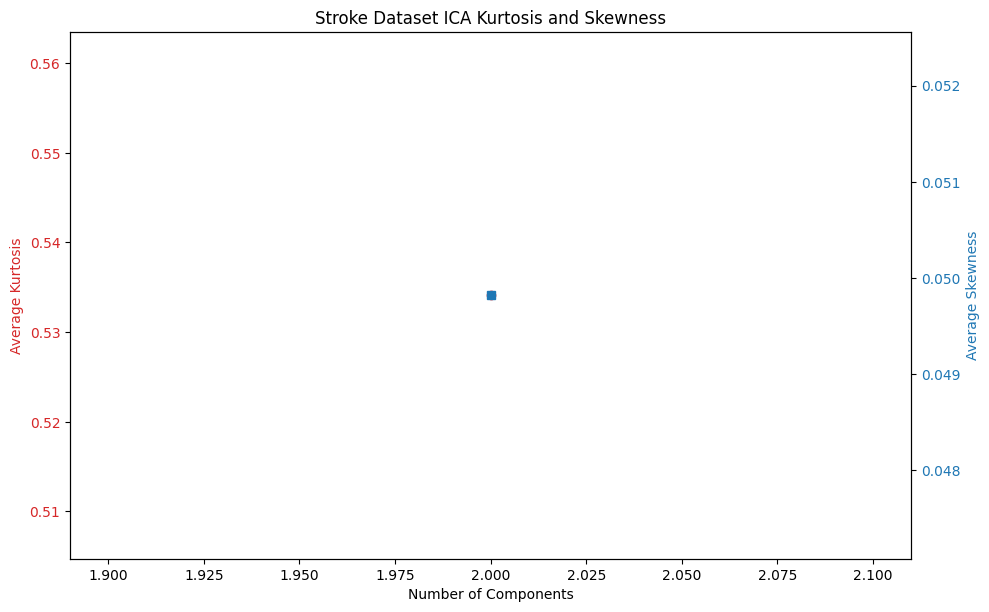

In [2]:
if __name__ == "__main__":
    # Set the range for the number of components
    n_components_range = [2]

    # Perform the ICA experiment
    stroke_ica_results = perform_ica(
        strokeX, n_components_range, random_state=RANDOM_STATE
    )

    # Print results
    display(stroke_ica_results)

    # Save the figures
    plot_ica_results(
        stroke_ica_results,
        "Stroke Dataset ICA Kurtosis and Skewness",
        save_path="stroke_ica.png",
    )

  0%|          | 0/18 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
  6%|▌         | 1/18 [01:34<26:49, 94.68s/it]/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fa

,n_components,avg_kurtosis,std_kurtosis,avg_skewness,std_skewness
0,19,13.271842,0.711041,-0.000265,0.913863
1,18,14.262292,0.871322,-0.412021,0.374145
2,17,15.083836,0.552616,-0.953112,0.439981
3,16,15.858947,0.821184,0.517074,0.399424
4,15,15.549833,0.142461,-1.523124,0.039552
5,14,16.423683,0.084511,-1.166115,0.054470
6,13,17.806593,0.073861,-0.671504,1.391141
7,12,18.865637,0.072009,-0.285924,1.012150
8,11,19.484928,0.273615,0.066012,1.363889
9,10,20.512047,0.307181,1.452842,0.005150


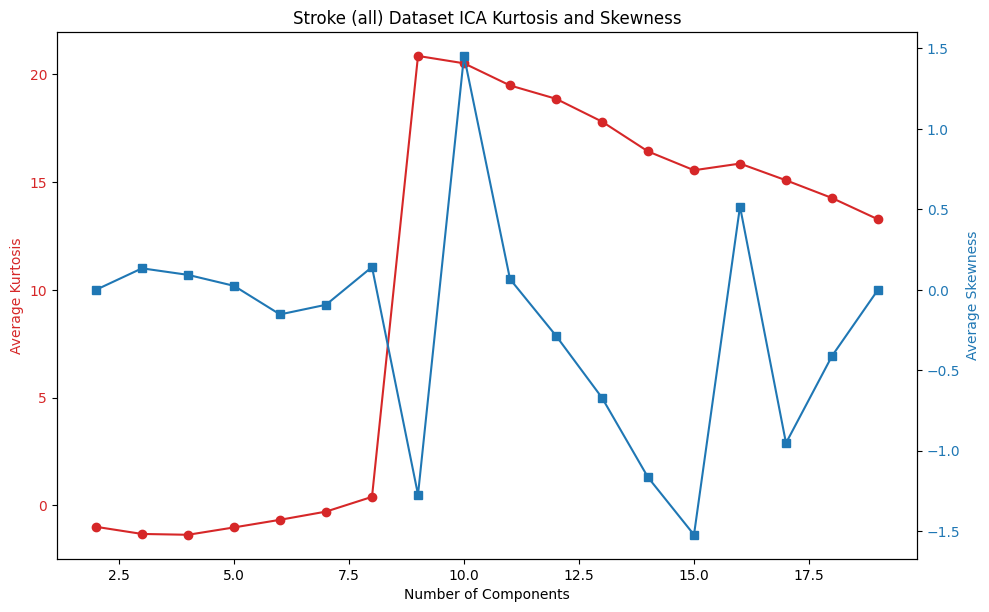

In [3]:
if __name__ == "__main__":
    # Set the range for the number of components
    n_components_range = list(range(2, strokeX_all.shape[1] + 1))[::-1]

    # Perform the ICA experiment
    stroke_all_ica_results = perform_ica(
        strokeX_all, n_components_range, random_state=RANDOM_STATE
    )

    # Print results
    display(stroke_all_ica_results)

    # Save the figures
    plot_ica_results(
        stroke_all_ica_results,
        "Stroke (all) Dataset ICA Kurtosis and Skewness",
        save_path="stroke_all_ica.png",
    )

  0%|          | 0/17 [00:00<?, ?it/s]/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
  6%|▌         | 1/17 [01:25<22:46, 85.42s/it]/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_fa

,n_components,avg_kurtosis,std_kurtosis,avg_skewness,std_skewness
0,18,33.403376,6.435123,-1.112220,1.163523
1,17,36.186349,6.295310,0.754825,0.312779
2,16,35.055733,5.848142,-0.979387,0.564417
3,15,36.374753,6.557312,0.202449,0.410735
4,14,36.381434,5.559384,-1.887755,0.975751
5,13,38.196046,6.059384,-0.959405,0.083680
6,12,40.136036,6.375864,-1.867843,0.117663
7,11,41.000032,7.918093,-1.285764,0.692643
8,10,44.369092,8.451467,-0.068663,1.362569
9,9,48.386042,9.072359,1.575276,0.275950


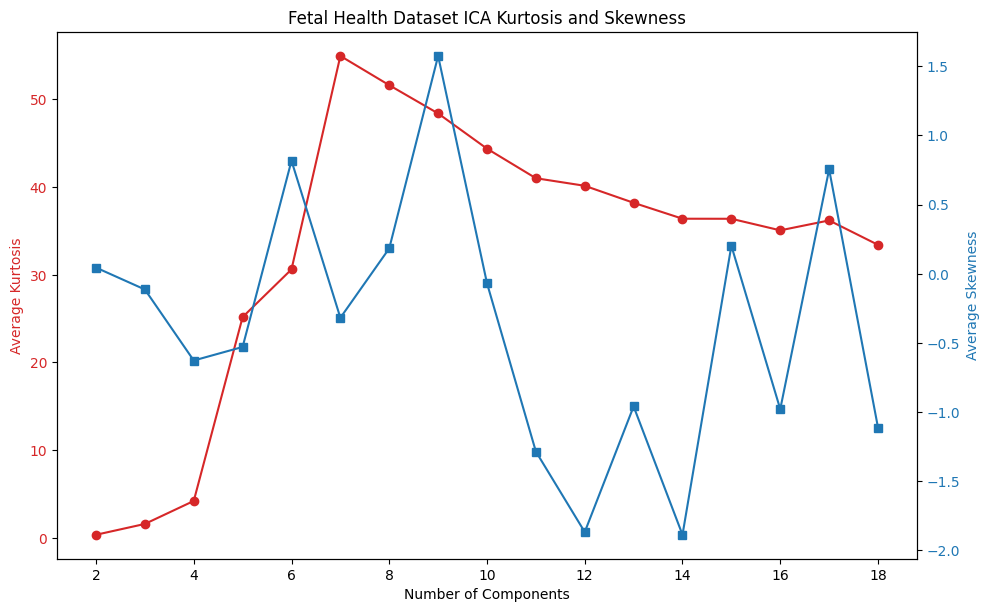

In [4]:
if __name__ == "__main__":
    # Set the range for the number of components
    n_components_range = list(range(2, fetalX.shape[1] + 1))[::-1]

    # Perform the ICA experiment
    fetal_ica_results = perform_ica(
        fetalX, n_components_range, random_state=RANDOM_STATE
    )

    # Print results
    display(fetal_ica_results)

    # Save the figures
    plot_ica_results(
        fetal_ica_results,
        "Fetal Health Dataset ICA Kurtosis and Skewness",
        save_path="fetal_ica.png",
    )